## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Declare variables and
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Display the data table for preview
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
mouse_study_comb_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_study_comb_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Display the data table for preview
# mouse_study_comb_df.head()

In [9]:
# Checking the number of mice.
# Calculate the number of unique mice
mice_count = len(mouse_study_comb_df["Mouse ID"].unique())
print(mice_count)



249


In [10]:
#check for any mouse ID with duplicate time points
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mice_count_dup = mouse_study_comb_df.loc[mouse_study_comb_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mice_count_dup

# mice_count.duplicates(subset=[Timepoint])

array(['g989'], dtype=object)

In [11]:
#Display the data associated with that mouse ID, 
mice_count_dup = mouse_study_comb_df.loc[mouse_study_comb_df['Mouse ID'] == "g989", :]

mice_count_dup


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_df = mouse_study_comb_df[mouse_study_comb_df['Mouse ID'].isin(mice_count_dup)==False]
new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = new_df["Mouse ID"].nunique()
new_mice_count

249

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen 

summary =  new_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary




Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [15]:
# Use groupby and summary statistical methods to calculate the following 
#properties of each drug regimen: # mean, median, variance, 
#standard deviation, and SEM of the tumor volume. 
#stat = ['mean', 'median', 'var', 'std', 'sem']

mean = new_df['Tumor Volume (mm3)'].groupby(new_df['Drug Regimen']).mean()
median = new_df['Tumor Volume (mm3)'].groupby(new_df['Drug Regimen']).median()
var = new_df['Tumor Volume (mm3)'].groupby(new_df['Drug Regimen']).var()
std = new_df['Tumor Volume (mm3)'].groupby(new_df['Drug Regimen']).std()
sem = new_df['Tumor Volume (mm3)'].groupby(new_df['Drug Regimen']).sem()


In [16]:
# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_df =  new_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [18]:
# Generate a bar plot showing the total number of timepoints 
#for all mice tested for each drug regimen using Pandas.
mice_count_df = new_df["Drug Regimen"].value_counts()
mice_count_df

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Number of Timepoints of Mice per Treatment')

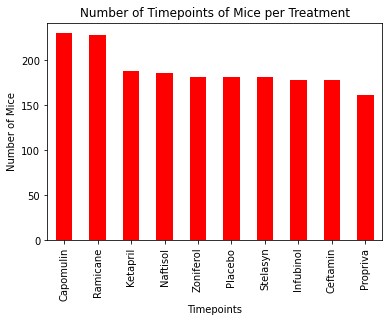

In [22]:
# Generate a bar plot showing the total number of timepoints 
# for all mice tested for each drug regimen using Pandas.
plot_pandas = mice_count_df.plot.bar(color='r')  
plt.xlabel("Timepoints")
plt.ylabel("Number of Mice")
plt.title("Number of Timepoints of Mice per Treatment")

Text(0.5, 1.0, 'Number of Mice per Treatment')

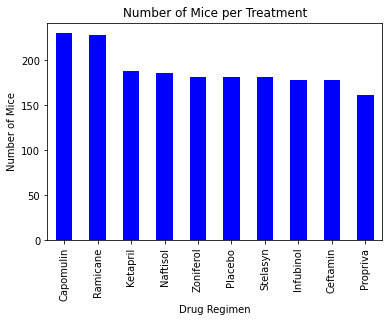

In [23]:
# Generate a bar plot showing the total number of 
#timepoints for all mice tested for each drug regimen using pyplot.

plot_pandas = mice_count_df.plot.bar(color='b')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")



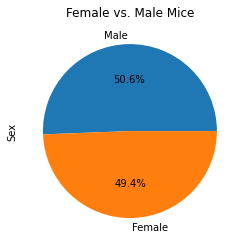

In [24]:
# Generate a pie plot showing the distribution of female 
#versus male mice using Pandas
gender_data = new_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()


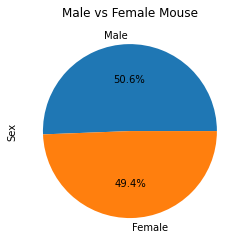

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = new_df.loc[new_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = new_df.loc[new_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = new_df.loc[new_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = new_df.loc[new_df["Drug Regimen"] == "Ceftamin", :]


In [34]:
# Start by getting the last (greatest) timepoint for each mouse
# Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, new_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [35]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Ceftamin
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [37]:
#Ramicane
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, new_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
Ramicane_merge.to_csv("output.csv")
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [39]:
# Infubinol 
# Determine outliers using upper and lower bounds

Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, new_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [40]:
# Infubinol
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
Infubinol_merge.to_csv("output.csv")

The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [41]:
# Ceftamin
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, new_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [42]:
# Ceftamin quartiles and IQR
# Determine outliers using upper and lower bounds

Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


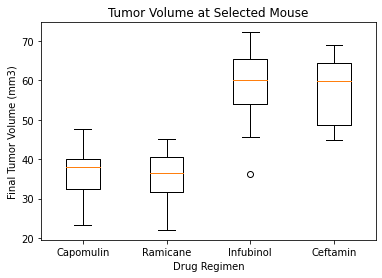

In [43]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
#data_to_plot=data_to_plot.values
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, vert=True)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

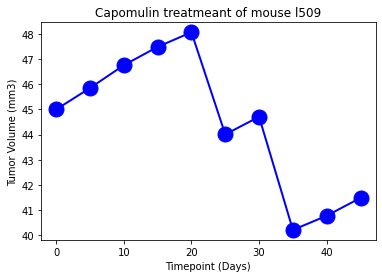

In [44]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

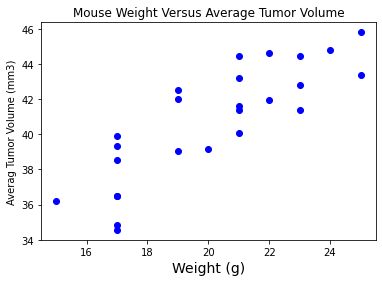

In [45]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

In [46]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84
